# Imports

In [1]:
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import cvxpy as cp
import time
import collections
from typing import Dict
from typing import List
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import imp
import os
import pickle as pk
import scipy as sp
from statsmodels.tsa.stattools import grangercausalitytests
%matplotlib inline

import sys
sys.path.insert(0, '../../../src/')

import network_utils
import utils

/home/omid/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Loading the preprocessed data

In [2]:
loaded_d = utils.load_it('/home/omid/Downloads/DT/cvx_data.pk')
obs = loaded_d['obs']
T = loaded_d['T']

periods = [['1995-01-01', '1995-03-26'],
 ['1995-03-26', '1995-06-18'],
 ['1995-06-18', '1995-09-10'],
 ['1995-09-10', '1995-12-03'],
 ['1995-12-03', '1996-02-25'],
 ['1996-02-25', '1996-05-19'],
 ['1996-05-19', '1996-08-11'],
 ['1996-08-11', '1996-11-03'],
 ['1996-11-03', '1997-01-26'],
 ['1997-01-26', '1997-04-20'],
 ['1997-04-20', '1997-07-13'],
 ['1997-07-13', '1997-10-05'],
 ['1997-10-05', '1997-12-28'],
 ['1997-12-28', '1998-03-22'],
 ['1998-03-22', '1998-06-14'],
 ['1998-06-14', '1998-09-06'],
 ['1998-09-06', '1998-11-29'],
 ['1998-11-29', '1999-02-21'],
 ['1999-02-21', '1999-05-16'],
 ['1999-05-16', '1999-08-08'],
 ['1999-08-08', '1999-10-31'],
 ['1999-10-31', '2000-01-23'],
 ['2000-01-23', '2000-04-16'],
 ['2000-04-16', '2000-07-09'],
 ['2000-07-09', '2000-10-01'],
 ['2000-10-01', '2000-12-24'],
 ['2000-12-24', '2001-03-18'],
 ['2001-03-18', '2001-06-10'],
 ['2001-06-10', '2001-09-02'],
 ['2001-09-02', '2001-11-25'],
 ['2001-11-25', '2002-02-17'],
 ['2002-02-17', '2002-05-12'],
 ['2002-05-12', '2002-08-04'],
 ['2002-08-04', '2002-10-27'],
 ['2002-10-27', '2003-01-19'],
 ['2003-01-19', '2003-04-13'],
 ['2003-04-13', '2003-07-06'],
 ['2003-07-06', '2003-09-28'],
 ['2003-09-28', '2003-12-21'],
 ['2003-12-21', '2004-03-14'],
 ['2004-03-14', '2004-06-06'],
 ['2004-06-06', '2004-08-29'],
 ['2004-08-29', '2004-11-21'],
 ['2004-11-21', '2005-02-13'],
 ['2005-02-13', '2005-05-08'],
 ['2005-05-08', '2005-07-31'],
 ['2005-07-31', '2005-10-23'],
 ['2005-10-23', '2006-01-15'],
 ['2006-01-15', '2006-04-09'],
 ['2006-04-09', '2006-07-02'],
 ['2006-07-02', '2006-09-24'],
 ['2006-09-24', '2006-12-17'],
 ['2006-12-17', '2007-03-11'],
 ['2007-03-11', '2007-06-03'],
 ['2007-06-03', '2007-08-26'],
 ['2007-08-26', '2007-11-18'],
 ['2007-11-18', '2008-02-10'],
 ['2008-02-10', '2008-05-04'],
 ['2008-05-04', '2008-07-27'],
 ['2008-07-27', '2008-10-19'],
 ['2008-10-19', '2009-01-11'],
 ['2009-01-11', '2009-04-05'],
 ['2009-04-05', '2009-06-28'],
 ['2009-06-28', '2009-09-20'],
 ['2009-09-20', '2009-12-13'],
 ['2009-12-13', '2010-03-07'],
 ['2010-03-07', '2010-05-30'],
 ['2010-05-30', '2010-08-22'],
 ['2010-08-22', '2010-11-14'],
 ['2010-11-14', '2011-02-06'],
 ['2011-02-06', '2011-05-01'],
 ['2011-05-01', '2011-07-24'],
 ['2011-07-24', '2011-10-16'],
 ['2011-10-16', '2012-01-08'],
 ['2012-01-08', '2012-04-01'],
 ['2012-04-01', '2012-06-24'],
 ['2012-06-24', '2012-09-16'],
 ['2012-09-16', '2012-12-09'],
 ['2012-12-09', '2013-03-03'],
 ['2013-03-03', '2013-05-26'],
 ['2013-05-26', '2013-08-18'],
 ['2013-08-18', '2013-11-10'],
 ['2013-11-10', '2014-02-02'],
 ['2014-02-02', '2014-04-27'],
 ['2014-04-27', '2014-07-20'],
 ['2014-07-20', '2014-10-12'],
 ['2014-10-12', '2015-01-04'],
 ['2015-01-04', '2015-03-29'],
 ['2015-03-29', '2015-06-21'],
 ['2015-06-21', '2015-09-13'],
 ['2015-09-13', '2015-12-06'],
 ['2015-12-06', '2016-02-28'],
 ['2016-02-28', '2016-05-22'],
 ['2016-05-22', '2016-08-14'],
 ['2016-08-14', '2016-11-06'],
 ['2016-11-06', '2017-01-29'],
 ['2017-01-29', '2017-04-23'],
 ['2017-04-23', '2017-07-16'],
 ['2017-07-16', '2017-10-08'],
 ['2017-10-08', '2017-12-31'],
 ['2017-12-31', '2018-03-25'],
 ['2018-03-25', '2018-06-17'],
 ['2018-06-17', '2018-09-09']]

/home/omid/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


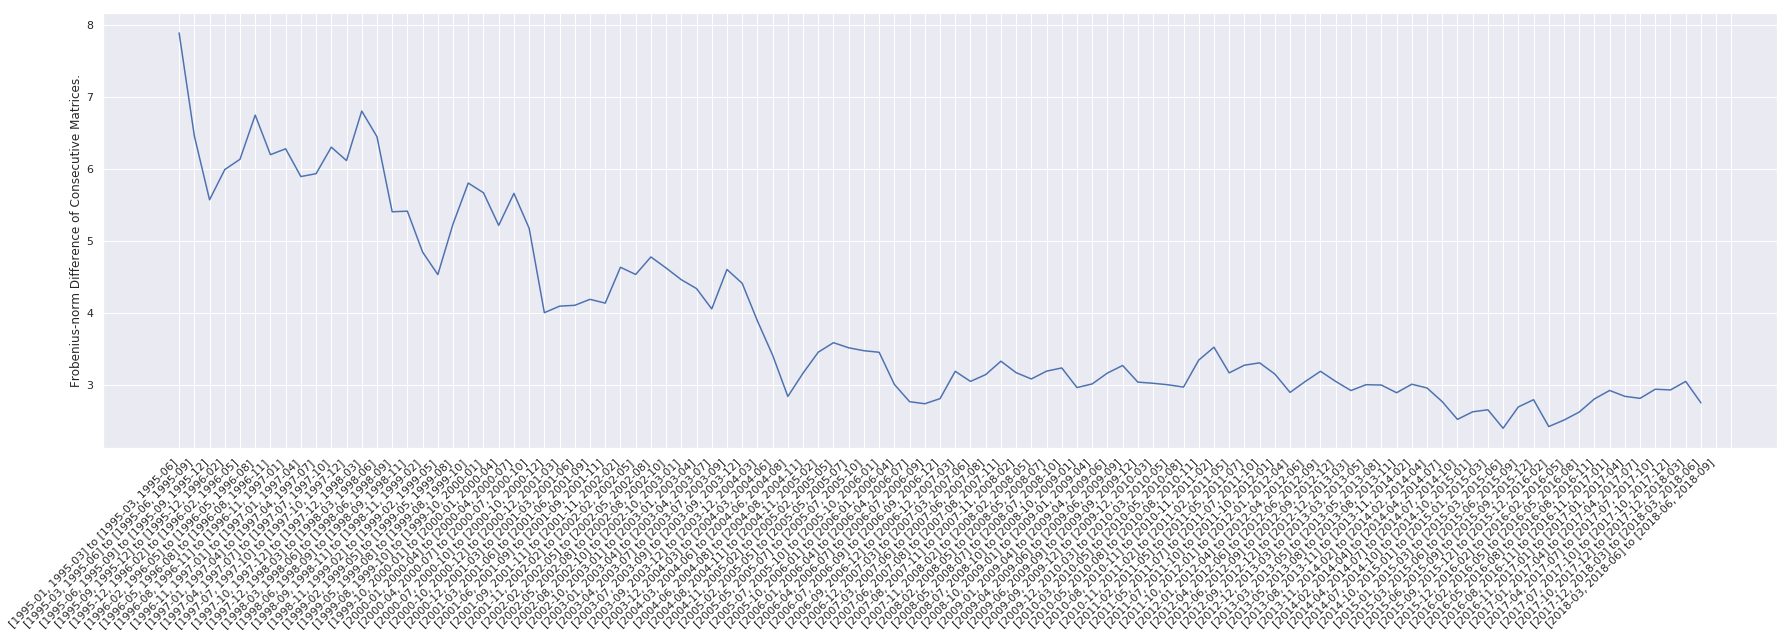

In [3]:
sns.set(rc={'figure.figsize': (30, 8)})
acc_from_prev_l2norm_dists = []
n = len(T)
for i in range(1, n):
    current = T[i]
    prev = T[i-1]
    acc_from_prev_l2norm_dists.append(np.linalg.norm(prev - current))
plt.plot(acc_from_prev_l2norm_dists)
plt.ylabel('Frobenius-norm Difference of Consecutive Matrices.')
# seting xticks
ax = plt.axes()
number_of_periods = len(periods)
ax.set_xticks(list(range(number_of_periods)))
labels = ['[{}, {}] to [{}, {}]'.format(periods[i][0][:7], periods[i][1][:7], periods[i+1][0][:7], periods[i+1][1][:7]) for i in range(number_of_periods-1)]
ax.set_xticklabels(labels, rotation=45);
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")

# Death data analysis

In [4]:
all_death_data = pd.read_csv(
    '/home/omid/Datasets/deaths/battle-related-deaths-in-state-based-conflicts-since-1946-by-world-region.csv')
all_death_data.drop(columns=['Code'], inplace=True)

In [5]:
all_death_data.head()

,Entity,Year,Battle-related deaths
0,Africa (inc. North Africa),1946,0.0
1,Africa (inc. North Africa),1947,0.0
2,Africa (inc. North Africa),1948,0.0
3,Africa (inc. North Africa),1949,0.0
4,Africa (inc. North Africa),1950,0.0


In [6]:
all_death_data.Entity.unique()

array(['Africa (inc. North Africa)', 'Americas', 'Asia and Oceania',
       'Europe', 'Middle East'], dtype=object)

In [7]:
# death_data = all_death_data[all_death_data['Entity'] == 'Asia and Oceania']
death_data = all_death_data

In [8]:
ad = death_data.groupby('Year').sum()
annual_deaths = np.array(ad['Battle-related deaths'])
years = death_data.Year.unique()

In [9]:
indices = np.where(years >= 1995)[0]
years = years[indices]
annual_deaths = annual_deaths[indices]

In [10]:
years

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

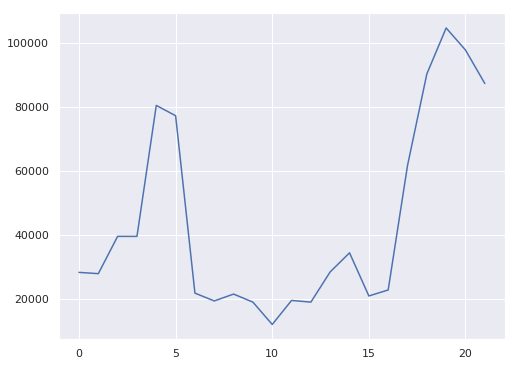

In [11]:
sns.set(rc={'figure.figsize': (8, 6)})
plt.plot(annual_deaths);

In [12]:
len(years)

22

In [13]:
frob_norms = []
for i in range(len(years)):
    index = i * 4
    frob_norms.append(np.linalg.norm(T[index+1] - T[index]))

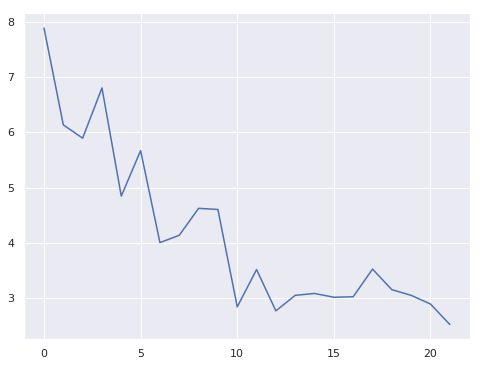

In [14]:
sns.set(rc={'figure.figsize': (8, 6)})
plt.plot(frob_norms);

In [15]:
# It tests whether the time series in the second column Granger causes the time series in the first column.
grangercausalitytests(
    np.column_stack((frob_norms, annual_deaths)),
    maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2713  , p=0.6088  , df_denom=18, df_num=1
ssr based chi2 test:   chi2=0.3165  , p=0.5737  , df=1
likelihood ratio test: chi2=0.3141  , p=0.5752  , df=1
parameter F test:         F=0.2713  , p=0.6088  , df_denom=18, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1877  , p=0.3320  , df_denom=15, df_num=2
ssr based chi2 test:   chi2=3.1672  , p=0.2052  , df=2
likelihood ratio test: chi2=2.9401  , p=0.2299  , df=2
parameter F test:         F=1.1877  , p=0.3320  , df_denom=15, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7629  , p=0.2076  , df_denom=12, df_num=3
ssr based chi2 test:   chi2=8.3739  , p=0.0389  , df=3
likelihood ratio test: chi2=6.9379  , p=0.0739  , df=3
parameter F test:         F=1.7629  , p=0.2076  , df_denom=12, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.5466  , p=0.1124  , df_d

{1: ({'lrtest': (0.3141277926089785, 0.5751581840576722, 1),
   'params_ftest': (0.2712762738847741, 0.6088252637298948, 18.0, 1),
   'ssr_chi2test': (0.31648898619890664, 0.5737253150216988, 1),
   'ssr_ftest': (0.2712762738847771, 0.6088252637298921, 18.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (2.9400900787632622, 0.2299151297182535, 2),
   'params_ftest': (1.187693851445211, 0.3320287293863238, 15.0, 2),
   'ssr_chi2test': (3.1671836039244936, 0.20523660350028733, 2),
   'ssr_ftest': (1.1876938514716853, 0.3320287293787351, 15.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (6.937857945524836, 0.07390504848587971, 3),
   'params_ftest': (1.7629228158251629, 0.20763101160303052, 12.0, 3),
   'ssr_chi2test': (8.373883375042812, 0.03888475761807269, 3),
   'ssr_ftest': (1.7629228157984866, 0.20763101160806768, 12.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1

In [16]:
sp.stats.pearsonr(frob_norms, annual_deaths)

(-0.15141220115912354, 0.5011854838443499)

# Relationship with trade (similar to Jackson's pnas paper)

In [17]:
# 1995 to 2017.
trade_in_percent_of_gdp = np.array(
    [43.403, 43.661, 45.613, 46.034, 46.552,
     51.156, 50.012, 49.66, 50.797, 54.085,
     56.169, 58.412, 58.975, 60.826, 52.31,
     56.82, 60.427, 60.474, 60.021, 59.703, 57.798, 56.096, 57.85])

In [18]:
frob_norms = []
for i in range(len(trade_in_percent_of_gdp)):
    index = i * 4
    frob_norms.append(np.linalg.norm(T[index+1] - T[index]))

In [19]:
# It tests whether the time series in the second column Granger causes the time series in the first column.
grangercausalitytests(
    np.column_stack((frob_norms, trade_in_percent_of_gdp)),
    maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.1735 , p=0.0048  , df_denom=19, df_num=1
ssr based chi2 test:   chi2=11.7798 , p=0.0006  , df=1
likelihood ratio test: chi2=9.4341  , p=0.0021  , df=1
parameter F test:         F=10.1735 , p=0.0048  , df_denom=19, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6357  , p=0.2258  , df_denom=16, df_num=2
ssr based chi2 test:   chi2=4.2936  , p=0.1169  , df=2
likelihood ratio test: chi2=3.9066  , p=0.1418  , df=2
parameter F test:         F=1.6357  , p=0.2258  , df_denom=16, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5014  , p=0.6878  , df_denom=13, df_num=3
ssr based chi2 test:   chi2=2.3143  , p=0.5098  , df=3
likelihood ratio test: chi2=2.1899  , p=0.5339  , df=3
parameter F test:         F=0.5014  , p=0.6878  , df_denom=13, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4621  , p=0.7623  , df_d

{1: ({'lrtest': (9.434070155565827, 0.0021299105288239356, 1),
   'params_ftest': (10.17348794857101, 0.004825457771844453, 19.0, 1),
   'ssr_chi2test': (11.779828150976932, 0.0005987601167452549, 1),
   'ssr_ftest': (10.173487948570989, 0.004825457771844496, 19.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (3.9066186460636487, 0.14180401893160582, 2),
   'params_ftest': (1.635661939046066, 0.22577063720090382, 16.0, 2),
   'ssr_chi2test': (4.293612589995925, 0.11685676849849307, 2),
   'ssr_ftest': (1.635661939046067, 0.22577063720090382, 16.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (2.189882460430855, 0.5339439594617632, 3),
   'params_ftest': (0.5014252268635698, 0.6878242333294633, 13.0, 3),
   'ssr_chi2test': (2.314270277831883, 0.5097926144658629, 3),
   'ssr_ftest': (0.5014252268635747, 0.6878242333294602, 13.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0

In [37]:
# It tests whether the time series in the second column Granger causes the time series in the first column.
grangercausalitytests(
    np.column_stack((trade_in_percent_of_gdp, frob_norms)),
    maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7792  , p=0.0266  , df_denom=19, df_num=1
ssr based chi2 test:   chi2=6.6917  , p=0.0097  , df=1
likelihood ratio test: chi2=5.8424  , p=0.0156  , df=1
parameter F test:         F=5.7792  , p=0.0266  , df_denom=19, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9345  , p=0.1768  , df_denom=16, df_num=2
ssr based chi2 test:   chi2=5.0781  , p=0.0789  , df=2
likelihood ratio test: chi2=4.5480  , p=0.1029  , df=2
parameter F test:         F=1.9345  , p=0.1768  , df_denom=16, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4357  , p=0.1113  , df_denom=13, df_num=3
ssr based chi2 test:   chi2=11.2416 , p=0.0105  , df=3
likelihood ratio test: chi2=8.9204  , p=0.0304  , df=3
parameter F test:         F=2.4357  , p=0.1113  , df_denom=13, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3279  , p=0.3249  , df_d

{1: ({'lrtest': (5.842420401865979, 0.015644291722143933, 1),
   'params_ftest': (5.779174014260967, 0.02658339911643309, 19.0, 1),
   'ssr_chi2test': (6.691675174407543, 0.009686414394300511, 1),
   'ssr_ftest': (5.77917401426106, 0.026583399116432017, 19.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (4.548012492058973, 0.10289911404640531, 2),
   'params_ftest': (1.934500173855811, 0.1768282798882153, 16.0, 2),
   'ssr_chi2test': (5.078062956371543, 0.0789428206209287, 2),
   'ssr_ftest': (1.9345001738558258, 0.17682827988821317, 16.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (8.920395642050309, 0.0303682081775866, 3),
   'params_ftest': (2.435690259173733, 0.11131143864042868, 13.0, 3),
   'ssr_chi2test': (11.24164735003262, 0.010488450541518837, 3),
   'ssr_ftest': (2.435690259173734, 0.11131143864042845, 13.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1.,

In [20]:
sp.stats.pearsonr(frob_norms, trade_in_percent_of_gdp)

(-0.861545912333639, 1.292477830870093e-07)

In [39]:
sp.stats.pearsonr(frob_norms, 1/trade_in_percent_of_gdp)

(0.8819609267540132, 2.6585601676160044e-08)

In [21]:
sp.stats.spearmanr(frob_norms, trade_in_percent_of_gdp)

SpearmanrResult(correlation=-0.7045454545454546, pvalue=0.00017468943580829403)

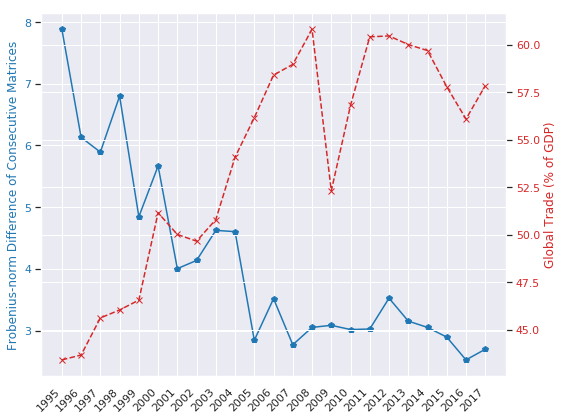

In [35]:
sns.set(rc={'figure.figsize': (8, 6)})
fig, ax1 = plt.subplots()

color = 'tab:blue'
# ax1.set_xlabel('time (s)')
ax1.set_ylabel('Frobenius-norm Difference of Consecutive Matrices', color=color)
ax1.plot(frob_norms, '-p', color=color)
ax1.tick_params(axis='y', labelcolor=color)
# ax|1.legend(['Distance of matrices'])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Global Trade (% of GDP)', color=color)  # we already handled the x-label with ax1
ax2.plot(trade_in_percent_of_gdp, '-x', color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
# ax2.legend(['Trades'], loc='center')

# seting xticks
labels = [year for year in range(1995, 2018)]
ax1.set_xticks(list(range(len(labels))))
ax1.set_xticklabels(labels, rotation=45);
for tick in ax1.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('frobenius_vs_trade.pdf', bbox_inches='tight')

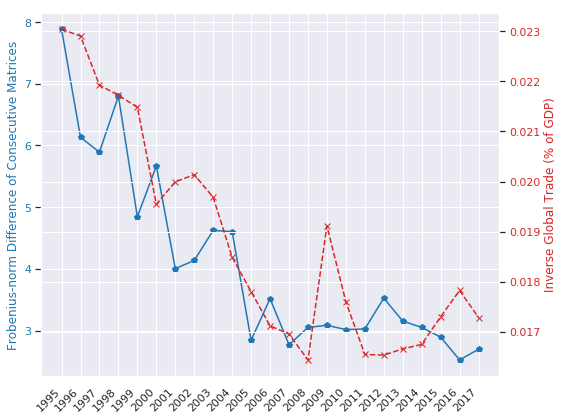

In [36]:
sns.set(rc={'figure.figsize': (8, 6)})
fig, ax1 = plt.subplots()

color = 'tab:blue'
# ax1.set_xlabel('time (s)')
ax1.set_ylabel('Frobenius-norm Difference of Consecutive Matrices', color=color)
ax1.plot(frob_norms, '-p', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Inverse Global Trade (% of GDP)', color=color)  # we already handled the x-label with ax1
ax2.plot(1/trade_in_percent_of_gdp, '-x', color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# seting xticks
labels = [year for year in range(1995, 2018)]
ax1.set_xticks(list(range(len(labels))))
ax1.set_xticklabels(labels, rotation=45);
for tick in ax1.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('frobenius_vs_inversetrade.pdf', bbox_inches='tight')